In [1]:
import pandas as pd
import numpy as np
from custom_knn import Custom_knn
from data_preparation import *
from strategy_implementation import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("TSLA_weekly_return_volatility.csv")

# best value of k from the last assignment
k = 5

# p value in different metrixs
euclidean_p = 2
manhattan_p = 1
minkovski_p = 1.5

def prediction_y(k, p, X_train, Y_train, X_test):
    knn = Custom_knn(k, p)
    knn.fit(X_train, Y_train)
    y_predict = knn.predict(X_test)
    return y_predict

def metric_accuracy(y_predict, Y_test):
    accuracy = sum(y_predict == Y_test)/len(y_predict)
    return round(accuracy, 2)

### 1. Use custom knn to train and test 2018 data

In [3]:
df_18 = year_data(df, 2018)

# setting x and y
X_18 = X(df_18)
Y_18= Y(df_18)

# split 2018 data to train and test
X_train_1, X_new, y_label, y_test = train_test_split(X_18, Y_18, test_size=0.5, random_state=3)
scale_X = StandardScaler().fit(X_train_1)
X_train_1 = scale_X.transform(X_train_1)
X_new = scale_X.transform(X_new)

# Euclidean distance metrics
e_y_predict = prediction_y(k, euclidean_p, X_train_1, y_label, X_new)
euclidean_accuracy = metric_accuracy(e_y_predict, y_test)
print(f"The euclidean accuarcy for testing 2018 data is {euclidean_accuracy}")

# Manhattan distance metrics
m_y_predict = prediction_y(k, manhattan_p, X_train_1, y_label, X_new)
manhattan_accuracy = metric_accuracy(m_y_predict, y_test)
print(f"The manhattan accuarcy for testing 2018 data is {manhattan_accuracy}")

# generalized Minkovski distance metrics
mk_y_predict = prediction_y(k, minkovski_p, X_train_1, y_label, X_new)
minkovski_accuracy = metric_accuracy(mk_y_predict, y_test)
print(f"The generalized minkovski accuarcy for testing 2018 data is {minkovski_accuracy}")

The euclidean accuarcy for testing 2018 data is 0.81
The manhattan accuarcy for testing 2018 data is 0.89
The generalized minkovski accuarcy for testing 2018 data is 0.85


Given the k value of 3, I split 2018 data to train and test among the three distance metrics. 
The results show that the manhattan has the highest accuracy 0.89.

### 2. Test year 2 with year 1 training data

In [4]:
# training
X_train = X(df_18)
Y_train = Y(df_18)

# testing
df_19 = year_data(df, 2019)
X_test = X(df_19)
Y_test = Y(df_19)

#scale
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scale_X.transform(X_test)

# Euclidean distance metrics
e_y_predict_19 = prediction_y(k, euclidean_p, X_train, Y_train, X_test)
euclidean_accuracy_19 = metric_accuracy(e_y_predict_19, Y_test)
print(f"The euclidean accuarcy for testing 2019 data is {euclidean_accuracy_19}")

# Manhattan distance metrics
m_y_predict_19 = prediction_y(k, manhattan_p, X_train, Y_train, X_test)
manhattan_accuracy_19 = metric_accuracy(m_y_predict_19, Y_test)
print(f"The manhattan accuarcy for testing 2019 data is {manhattan_accuracy_19}")

# generalized Minkovski distance metrics
mk_y_predict_19 = prediction_y(k, minkovski_p, X_train, Y_train, X_test)
minkovski_accuracy_19 = metric_accuracy(mk_y_predict_19, Y_test)
print(f"The generalized minkovski accuarcy for testing 2019 data is {minkovski_accuracy_19}")

The euclidean accuarcy for testing 2019 data is 0.94
The manhattan accuarcy for testing 2019 data is 0.92
The generalized minkovski accuarcy for testing 2019 data is 0.92


When it comes to testing 2019 data by training 2018 data, there is no difference on the accuracy between manhattan and minkovski metrices. 

### 3. For 2019, pick 2 weeks and draw their neighbors. p=1.5

In [5]:
# minkovski 
k = 3
p = 1.5
mk_knn = Custom_knn(k, p)
mk_knn.fit(X_train, Y_train)
y_predict = mk_knn.predict(X_test)
y_predict

array(['red', 'green', 'red', 'red', 'green', 'red', 'green', 'red',
       'red', 'red', 'red', 'red', 'green', 'red', 'red', 'green', 'red',
       'green', 'red', 'red', 'red', 'red', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red',
       'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green',
       'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green',
       'green', 'green', 'green', 'red'], dtype='<U32')

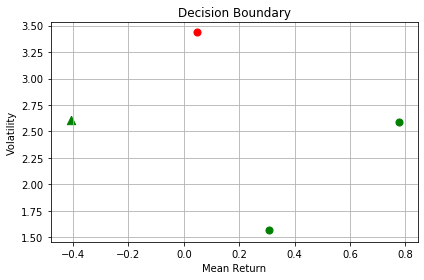

In [6]:
# choose a red week: week 4
new_x_1 = df_19.loc[3, ["mean_return", "volatility"]].values
mk_knn.draw_decision_boundary(new_x_1)

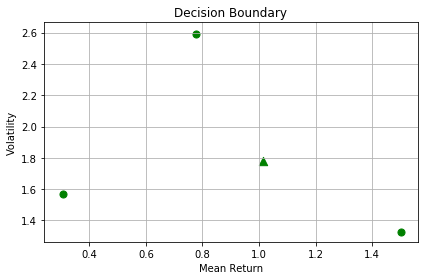

In [7]:
# choose a green week: week 5
new_x_2 = df_19.loc[4, ["mean_return", "volatility"]].values
mk_knn.draw_decision_boundary(new_x_2)

### 4. Compute confusion matrics for 2019

In [8]:
cm_euclidean = confusion_matrix(Y_test, e_y_predict_19)
cm_manhattan = confusion_matrix(Y_test, m_y_predict_19)
cm_minskovski = confusion_matrix(Y_test, mk_y_predict_19)
print("The confusion matrix for euclidean distance(p=1): \n", cm_euclidean)
print("\n The confusion matrix for manhattan distance(p=2): \n", cm_manhattan)
print("\n The confusion matrix for minskovski distance(p=1.5): \n", cm_minskovski)

The confusion matrix for euclidean distance(p=1): 
 [[24  0]
 [ 3 26]]

 The confusion matrix for manhattan distance(p=2): 
 [[23  1]
 [ 3 26]]

 The confusion matrix for minskovski distance(p=1.5): 
 [[23  1]
 [ 3 26]]


### 5. True positive rate(sensitivity or recall) and true negative rate (specificity) for 2019

In [9]:
# true positive rate (sensitivity or recall) TPR=TP/(TP+FN)
# true negative rate (specificity) TNR=TN/(TN+FP)
def tpr(confusion_metric):
    tpr = confusion_metric[0][0]/ np.sum(confusion_metric[0])
    return tpr

def tnr(confusion_metric):
    tnr = confusion_metric[1][1]/ np.sum(confusion_metric[1])
    return tnr

# euclidean
e_tpr = tpr(cm_euclidean)
e_tnr = tnr(cm_euclidean)
print(f"For the euclidean distance metric, \
true positive rate is {e_tpr:.2%}, and true negative rate is {e_tnr:.2%}")

# manhattan
m_tpr = tpr(cm_manhattan)
m_tnr = tnr(cm_manhattan)
print(f"For the manhattan distance metric, \
true positive rate is {m_tpr:.2%}, and true negative rate is {m_tnr:.2%}")

# minskovski
mk_tpr = tpr(cm_minskovski)
mk_tnr = tnr(cm_minskovski)
print(f"For the minskovski distance metric, \
true positive rate is {mk_tpr:.2%}, and true negative rate is {mk_tnr:.2%}")

For the euclidean distance metric, true positive rate is 100.00%, and true negative rate is 89.66%
For the manhattan distance metric, true positive rate is 95.83%, and true negative rate is 89.66%
For the minskovski distance metric, true positive rate is 95.83%, and true negative rate is 89.66%


The results show that euclidean distance metric has the prefect 100% true positive rate, but they all have the same true negative rate 89.66%.

### 6. Implement strategies

In [16]:
invest = 100
trade_18_19 = pd.read_csv("Trade_18_19.csv") 
columns = ["Week_Number", "Adj Close", "Return"]
trade_19 = trade_18_19.loc[trade_18_19["Year"] == 2019, columns].reset_index()

# euclidean
e_y_predict_19 = df_19.loc[:, "label"].tolist()
e_green_week = green_week(e_y_predict_19)
e_profit_loss_balance = profit_loss_balance(trade_19, invest, e_green_week)
e_final_balance = final_balance(e_profit_loss_balance)
print("The final balance of applying euclidean metric is", e_final_balance)

# manhattan
m_y_predict_19 = df_19.loc[:, "label"].tolist()
m_green_week = green_week(m_y_predict_19)
m_profit_loss_balance = profit_loss_balance(trade_19, invest, m_green_week)
m_final_balance = final_balance(m_profit_loss_balance)
print("The final balance of applying manhattan metric is", m_final_balance)

# minskovski
mk_y_predict_19 = df_19.loc[:, "label"].tolist()
mk_green_week = green_week(mk_y_predict_19)
mk_profit_loss_balance = profit_loss_balance(trade_19, invest, mk_green_week)
mk_final_balance = final_balance(mk_profit_loss_balance)
print("The final balance of applying minskovski metric is", mk_final_balance)

The final balance of applying euclidean metric is 469.43
The final balance of applying manhattan metric is 469.43
The final balance of applying minskovski metric is 469.43


In [17]:
# buy and hold
buy_in_price = trade_19.loc[0, "Adj Close"]
close_price = trade_19.loc[trade_19.index[-1], "Adj Close"]
buy_hold_end_value = buy_hold(invest, buy_in_price, close_price)
print("The final balance of buy and hold is", buy_hold_end_value)

The final balance of buy and hold is 134.89


With the comparison among the four strategies, the buy and hold strategy earns the least. 